# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [96]:
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [2]:
# filename of our data
adult_filename = os.path.join(os.getcwd(), "data", "adultData.csv")

# read our data into a csv
df_full = pd.read_csv(adult_filename, header=0)
df_full.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
0,39.0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Non-Female,2174,0,40.0,United-States,<=50K
1,50.0,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Non-Female,0,0,13.0,United-States,<=50K
2,38.0,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Non-Female,0,0,40.0,United-States,<=50K
3,53.0,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Non-Female,0,0,40.0,United-States,<=50K
4,28.0,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40.0,Cuba,<=50K


## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [28]:
# shape of our data
df_full.shape

(32561, 15)

In [29]:
df_full.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')

We're using the following columns in our model:
* workclass
* occupation
* relationship
* hours-per-week

Let's look at the unique values for each of these columns:

In [30]:
df_full['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [31]:
df_full['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', nan, 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [32]:
df_full['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [33]:
df_full['hours-per-week'].unique()

array([40., 13., 16., 45., 50., 80., 30., 35., nan, 60., 20., 52., 44.,
       15., 25., 38., 43., 55., 48., 58., 32., 70.,  2., 22., 56., 28.,
       36., 24., 46., 42., 12., 65.,  1., 10., 34., 75., 98., 33., 54.,
        8.,  6., 64., 19., 18., 72.,  5.,  9., 47., 37., 21., 26., 14.,
        4., 59.,  7., 99., 53., 39., 62., 41., 57., 78., 90., 66., 11.,
       49., 84.,  3., 17., 68., 27., 85., 31., 51., 77., 63., 23., 87.,
       88., 73., 89., 97., 94., 29., 96., 67., 82., 86., 91., 81., 76.,
       92., 61., 74., 95.])

We can work on manipulating some of these column values, for less complexity. For example, for workclass, we'll consolidate its values to "not-self-emp" and "self-emp". 

In [3]:
selfEmpList = ['Self-emp-not-inc', 'Self-emp-inc', "Never-worked"] # list of self-emp workclasses
df_full.loc[df_full["workclass"].isin(selfEmpList), "workclass"] = "self-emp"

notSelfEmpList = ['State-gov', 'Local-gov', 'Federal-gov', "Private", "Without-pay"] # list of not self-employed workclasses
df_full.loc[df_full["workclass"].isin(notSelfEmpList), "workclass"] = "not-self-emp"

df_full["workclass"].unique()

array(['not-self-emp', 'self-emp', nan], dtype=object)

The occupations don't need to be consolidated. However, we need some way to assign value to each occupation. We'll touch on this later on, but we'll give it a relative order to each of these occupation values, based on their average pay(based on data from reports such as from Glassdoor or Indeed).

The relationship column can be consolidated down to whether the person is currently in an family. 

In [4]:
notFamilyList = ['Not-in-family', 'Unmarried', 'no_family']
df_full.loc[df_full["relationship"].isin(notFamilyList), "relationship"] = "no_family"
df_full.loc[~df_full["relationship"].isin(notFamilyList), "relationship"] = "family"

df_full["relationship"].unique()

array(['no_family', 'family'], dtype=object)

The hours-per-week is already a numerical column, so we can analyze it later. 

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

Let's make a random sample from this data:

In [5]:
percentage = 0.3
num_rows = df_full.shape[0]

indices = np.random.choice(df_full.index, size=int(percentage*num_rows), replace=False)
df = df_full.loc[indices] 

Now that we've manipulated our columns to have proper values, we can start working with it, starting with ensuring there's no imbalance. We can first check using value_counts():

In [29]:
df["income_binary"].value_counts()

<=50K    7425
>50K     2343
Name: income_binary, dtype: int64

We can see there's a clear imbalance, with much more examples of <=50k than that of >50k. Let's check the imbalance with respect to the relationship and workclass labels.

In [30]:
df.groupby(['relationship', 'workclass', 'income_binary']).size()

relationship  workclass     income_binary
family        not-self-emp  <=50K            3438
                            >50K             1571
              self-emp      <=50K             465
                            >50K              367
no_family     not-self-emp  <=50K            2806
                            >50K              296
              self-emp      <=50K             215
                            >50K               58
dtype: int64

As we can see, there's generally an imbalance between the labels, with much more <=50k example. Let's address that, via upsampling:

In [6]:
low_income_fam_self_emp, high_income_fam_self_emp = df.groupby(['relationship', 'workclass', 'income_binary']).size()['family', 'self-emp']
class_imbalance = high_income_fam_self_emp / low_income_fam_self_emp

low_income_fam_not_self_emp, high_income_fam_not_self_emp = df.groupby(['relationship', 'workclass', 'income_binary']).size()['family', 'not-self-emp']
low_income_no_fam_not_self_emp, high_income_no_fam_not_self_emp = df.groupby(['relationship', 'workclass', 'income_binary']).size()['no_family', 'not-self-emp']
low_income_no_fam_self_emp, high_income_no_fam_self_emp = df.groupby(['relationship', 'workclass', 'income_binary']).size()['no_family', 'self-emp']

size1 = int(class_imbalance*low_income_fam_not_self_emp - high_income_fam_not_self_emp)
size2 = int(class_imbalance*low_income_no_fam_not_self_emp - high_income_no_fam_not_self_emp)
size3 = int(class_imbalance*low_income_no_fam_self_emp - high_income_no_fam_self_emp)

In [7]:
df_never_sampled = df_full.drop(labels=df.index, axis=0, inplace=False)

# upsample family, not-self-emp
condition = (df_never_sampled['income_binary']=='>50K') & (df_never_sampled['relationship']=='family') & (df_never_sampled['workclass']=='not-self-emp')
df_never_sampled_target = df_never_sampled[condition]
size=min(size1, df_never_sampled_target.shape[0])
indices = np.random.choice(df_never_sampled_target.index, size=size, replace=False)
rows = df_full.loc[indices]
df_balanced = df.append(rows)

# upsample no-family, not-self-emp
condition = (df_never_sampled['income_binary']=='>50K') & (df_never_sampled['relationship']=='no_family') & (df_never_sampled['workclass']=='not-self-emp')
df_never_sampled_target = df_never_sampled[condition]
size=min(size2, df_never_sampled_target.shape[0])
indices = np.random.choice(df_never_sampled_target.index, size=size, replace=False)
rows = df_full.loc[indices]
df_balanced = df_balanced.append(rows)

# upsample no-family, self-emp
condition = (df_never_sampled['income_binary']=='>50K') & (df_never_sampled['relationship']=='no_family') & (df_never_sampled['workclass']=='self-emp')
df_never_sampled_target = df_never_sampled[condition]
size=min(size3, df_never_sampled_target.shape[0])
indices = np.random.choice(df_never_sampled_target.index, size=size, replace=False)
rows = df_full.loc[indices]
df_balanced = df_balanced.append(rows)

In [8]:
df_balanced.groupby(['relationship', 'workclass', 'income_binary']).size()

relationship  workclass     income_binary
family        not-self-emp  <=50K            3469
                            >50K             2674
              self-emp      <=50K             476
                            >50K              367
no_family     not-self-emp  <=50K            2824
                            >50K              896
              self-emp      <=50K             241
                            >50K              158
dtype: int64

With this, most of the categories are fairly well balanced; although it's not perfect, it's better than our initial distribution. Let's quickly look at the datatypes of our columns.

In [51]:
df_balanced.dtypes

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object

The object datatype is a bit ambiguous. Let's get a more detailed view of our datatypes:

In [9]:
types_dict = {}
for column in df_balanced.columns:
    types_dict[column] = pd.api.types.infer_dtype(df[column])

types_dict

{'age': 'floating',
 'capital-gain': 'integer',
 'capital-loss': 'integer',
 'education': 'string',
 'education-num': 'integer',
 'fnlwgt': 'integer',
 'hours-per-week': 'floating',
 'income_binary': 'string',
 'marital-status': 'string',
 'native-country': 'string',
 'occupation': 'string',
 'race': 'string',
 'relationship': 'string',
 'sex_selfID': 'string',
 'workclass': 'string'}

Note the datatypes of the columns of interest:
* workclass: string
* relationship: string
* occupation: string
* hours-per-week: floating

The workclass and relationship columns are binary, while the hours-per-week is a decimal, so these are fairly easy to work with. However, occupation is a non-binary string, which isn't ordered.

In [12]:
df_balanced['occupation'].dtype

dtype('O')

Let's transform this column into an ordered one. We'll rank the occupations based on their average annual salary, according to data provided by Indeed and Glassdoor.

In [15]:
df_balanced['occupation'].unique()

array(['Craft-repair', 'Sales', 'Exec-managerial', 'Machine-op-inspct',
       'Other-service', 'Transport-moving', 'Prof-specialty',
       'Priv-house-serv', 'Tech-support', 'Adm-clerical',
       'Farming-fishing', nan, 'Handlers-cleaners', 'Protective-serv',
       'Armed-Forces'], dtype=object)

- Craft-repair: \$64k 
- Sales: \$84k
- Exec-managerial: \$76k
- Machine-op-inspct: \$46k
- Other-service: \$60k
- Transport-moving: \$41k
- Prof-speciality: \$165k
- Priv-house-serv: \$39k
- Tech-support: \$56k
- Adm-clerical: \$40k
- Farming-fishing: \$38k
- Handlers-cleaners: \$42k
- Protective-serv: \$60k
- Armed-Forces: \$82k

Salaries are rounded to the nearest thousands. We can then assign them an increasing order, like so:

In [16]:
occ_order = ["Farming-fishing", "Priv-house-serv", "Adm-clerical", "Transport-moving", "Handlers-cleaners", "Machine-op-inspct", "Tech-support", "Protective-serv", "Other-service", "Craft-repair", "Exec-managerial", "Armed-Forces", "Sales", "Prof-specialty"]
len(occ_order)

14

In [20]:
df_balanced['occupation'] = pd.Categorical(df_balanced['occupation'], ordered=True, categories=occ_order)

In [22]:
df_balanced['occupation'].dtype

CategoricalDtype(categories=['Farming-fishing', 'Priv-house-serv', 'Adm-clerical',
                  'Transport-moving', 'Handlers-cleaners', 'Machine-op-inspct',
                  'Tech-support', 'Protective-serv', 'Other-service',
                  'Craft-repair', 'Exec-managerial', 'Armed-Forces', 'Sales',
                  'Prof-specialty'],
                 ordered=True)

Now that we have ordered our occupations, we'll Winsorize our hours-per-week column, to prevent outliers:

In [30]:
df_balanced['hours-per-week'] = stats.mstats.winsorize(df_balanced['hours-per-week'], limits=[0.01, 0.01])
df_balanced.head(15)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
4476,21.0,not-self-emp,51985,HS-grad,9,Never-married,Craft-repair,no_family,White,Non-Female,0,0,40.0,United-States,<=50K
22124,59.0,not-self-emp,135647,11th,7,Married-civ-spouse,Sales,family,White,Non-Female,0,0,60.0,United-States,<=50K
27434,52.0,not-self-emp,155983,Bachelors,13,Married-civ-spouse,Exec-managerial,family,White,Non-Female,0,0,40.0,United-States,>50K
15884,21.0,not-self-emp,131620,HS-grad,9,Married-spouse-absent,Machine-op-inspct,family,White,Female,0,0,40.0,Dominican-Republic,<=50K
31916,18.0,not-self-emp,218889,9th,5,Never-married,Other-service,family,Black,Non-Female,0,0,35.0,United-States,<=50K
1955,40.0,not-self-emp,201495,11th,7,Never-married,Transport-moving,family,White,Non-Female,0,0,35.0,United-States,<=50K
26044,42.0,not-self-emp,177989,HS-grad,9,Married-civ-spouse,Transport-moving,family,White,Non-Female,0,0,40.0,United-States,<=50K
21359,29.0,not-self-emp,49087,Bachelors,13,Never-married,Prof-specialty,no_family,White,Non-Female,0,0,50.0,United-States,<=50K
23607,58.0,not-self-emp,119751,HS-grad,9,Married-civ-spouse,Priv-house-serv,family,Asian-Pac-Islander,Female,0,0,60.0,Philippines,<=50K
8508,54.0,not-self-emp,161334,Masters,14,Married-spouse-absent,Prof-specialty,no_family,Asian-Pac-Islander,Female,0,0,40.0,China,<=50K


We'll now address any missing data:

In [31]:
df_balanced.isnull().values.any()

True

In [32]:
df_balanced.isnull().head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary
4476,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
22124,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
27434,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
15884,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
31916,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [34]:
condition = nan_count != 0 # look for all columns with missing values

col_names = nan_count[condition].index # get the column names
print(col_names)

nan_cols = list(col_names) # convert column names to list
print(nan_cols)

Index(['age', 'workclass', 'occupation', 'hours-per-week', 'native-country'], dtype='object')
['age', 'workclass', 'occupation', 'hours-per-week', 'native-country']


In [35]:
nan_col_types = df[nan_cols].dtypes
nan_col_types

age               float64
workclass          object
occupation         object
hours-per-week    float64
native-country     object
dtype: object

We're interested in the workclass, occupation and hours-per-week examples. The workclass and occupation are both strings, and we can drop null strings, as it won't be helpful to our model:

In [36]:
df_balanced = df_balanced[df_balanced['workclass'].notna()]

In [37]:
df_balanced = df_balanced[df_balanced['occupation'].notna()]

In [38]:
df_balanced.groupby(['relationship', 'workclass', 'income_binary']).size()

relationship  workclass     income_binary
family        not-self-emp  <=50K            3469
                            >50K             2674
              self-emp      <=50K             473
                            >50K              367
no_family     not-self-emp  <=50K            2824
                            >50K              896
              self-emp      <=50K             241
                            >50K              158
dtype: int64

Our distributions are not impacted by these null string values. However, for the numrical hours-per-week, we'll replace null values with the mean:

In [88]:
mean_week =df['hours-per-week'].mean()

df_balanced['hours-per-week'].fillna(value=mean_week, inplace=True)

In [42]:
nan_count = np.sum(df_balanced.isnull(), axis = 0)
nan_count

age                57
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex_selfID          0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    206
income_binary       0
dtype: int64

Note how there aren't any more null values in the columns of interest! Let's now assign the categorical columns numerical values. 

In [43]:
df_balanced['occupation'].cat.codes

4476      9
22124    12
27434    10
15884     5
31916     8
         ..
6590      2
11211     9
5713     13
3220     10
3665     12
Length: 11102, dtype: int8

In [44]:
df_balanced['occupation'].cat.codes.unique()

array([ 9, 12, 10,  5,  8,  3, 13,  1,  6,  2,  0,  4,  7, 11], dtype=int8)

In [45]:
df_balanced['occupation'] = df_balanced['occupation'].cat.codes

In [46]:
df_balanced['occupation'].head()

4476      9
22124    12
27434    10
15884     5
31916     8
Name: occupation, dtype: int8

In [48]:
df_balanced["employed"] = np.where(df_balanced['workclass'] == "self-emp", 1, 0)

In [52]:
df_balanced["family"] = np.where(df_balanced['relationship'] == "family", 1, 0)

In [141]:
df_balanced["over_50k"] = np.where(df_balanced['income_binary'] == ">50K", 1, 0)

In [142]:
df_balanced.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex_selfID,capital-gain,capital-loss,hours-per-week,native-country,income_binary,employed,family,over_50k
4476,21.0,not-self-emp,51985,HS-grad,9,Never-married,9,no_family,White,Non-Female,0,0,40.0,United-States,<=50K,0,0,0
22124,59.0,not-self-emp,135647,11th,7,Married-civ-spouse,12,family,White,Non-Female,0,0,60.0,United-States,<=50K,0,1,0
27434,52.0,not-self-emp,155983,Bachelors,13,Married-civ-spouse,10,family,White,Non-Female,0,0,40.0,United-States,>50K,0,1,1
15884,21.0,not-self-emp,131620,HS-grad,9,Married-spouse-absent,5,family,White,Female,0,0,40.0,Dominican-Republic,<=50K,0,1,0
31916,18.0,not-self-emp,218889,9th,5,Never-married,8,family,Black,Non-Female,0,0,35.0,United-States,<=50K,0,1,0


In [145]:
df = df_balanced[["occupation", "hours-per-week", "employed", "family", "over_50k"]]

In [146]:
df.head()

,occupation,hours-per-week,employed,family,over_50k
4476,9,40.0,0,0,0
22124,12,60.0,0,1,0
27434,10,40.0,0,1,1
15884,5,40.0,0,1,0
31916,8,35.0,0,1,0


We can now use a KNN to create a model and training set:

In [147]:
X = df[['occupation', 'hours-per-week', 'employed', 'family']]
y = df[['over_50k']]

num_examples = X.shape[0]
print(num_examples)
num_features = X.shape[1]
print(num_features)

11102
4


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [149]:
model = KNeighborsClassifier(n_neighbors=2)

model.fit(X_train, y_train.values.ravel()) 

prediction= model.predict(X_test) 

print(prediction)

[0 0 0 ... 0 0 0]


In [150]:
score = accuracy_score(y_test, prediction)
print('Accuracy score of model: ' + str(score))

Accuracy score of model: 0.6920306168392616


We were able to fit and train the model. However, it only achieves an accuracy of 69%. Let's try to optimize this KNN model, by creating a classification model and evaluating the model.

In [151]:
def train_test_knn(X_train, X_test, y_train, y_test, k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train.values.ravel())
    class_label_predictions= model.predict(X_test)
    acc_score = accuracy_score(y_test, class_label_predictions)
    
    return acc_score

In [152]:
k_values = [10, 100, 1000]

acc1 = [] 

for k in k_values:
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1.append(float(score))

k=10, accuracy score: 0.7131922557406574
k=100, accuracy score: 0.7262494371904548
k=1000, accuracy score: 0.6938316073840612


We trained 3 classifiers on the train_test_knn() function we just implemented, but we can try again, using just a subset of our training data. 

In [85]:
k_values = [10, 100, 1000]

acc2 = [] 

for k in k_values:
    score = train_test_knn(X_train[:1500], X_test, y_train[:1500], y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc2.append(float(score))

k=10, accuracy score: 0.7064385411976587
k=100, accuracy score: 0.7131922557406574
k=1000, accuracy score: 0.6294461954074742


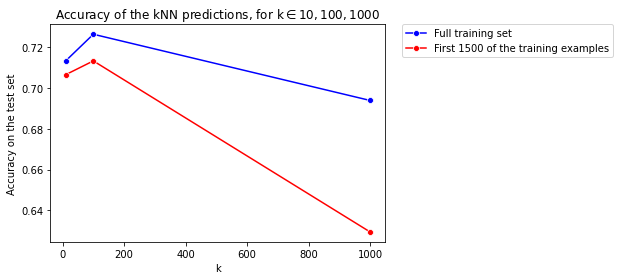

In [92]:
fig = plt.figure()
ax = fig.add_subplot(111)
p1 = sns.lineplot(x=k_values, y=acc1, color='b', marker='o', label = 'Full training set')
p2 = sns.lineplot(x=k_values, y=acc2, color='r', marker='o', label = 'First 1500 of the training examples')

plt.title('Accuracy of the kNN predictions, for k$\in{10,100,1000}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy on the test set')
plt.show()

Here, it looks like the accuracy is better when there's around a value of 100 for k, and using the full training set. Let's run the model through more classifiers. 

In [74]:
acc1_40 = [] 
print("Accuracy scores for full training data:")
for k in range(1,41):
    score = train_test_knn(X_train, X_test, y_train, y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc1_40.append(float(score))

Accuracy scores for full training data:
k=1, accuracy score: 0.6582620441242684
k=2, accuracy score: 0.6920306168392616
k=3, accuracy score: 0.6807744259342638
k=4, accuracy score: 0.6969833408374606
k=5, accuracy score: 0.6987843313822603
k=6, accuracy score: 0.704637550652859
k=7, accuracy score: 0.7095902746510581
k=8, accuracy score: 0.7140927510130571
k=9, accuracy score: 0.7167942368302567
k=10, accuracy score: 0.7131922557406574
k=11, accuracy score: 0.7194957226474561
k=12, accuracy score: 0.7163439891940567
k=13, accuracy score: 0.7266996848266547
k=14, accuracy score: 0.720396217919856
k=15, accuracy score: 0.7244484466456551
k=16, accuracy score: 0.7167942368302567
k=17, accuracy score: 0.7239981990094552
k=18, accuracy score: 0.7221972084646555
k=19, accuracy score: 0.7221972084646555
k=20, accuracy score: 0.7235479513732553
k=21, accuracy score: 0.7176947321026564
k=22, accuracy score: 0.7172444844664565
k=23, accuracy score: 0.7208464655560558
k=24, accuracy score: 0.7203

Again, this time, with just the subset of training data.

In [75]:
acc2_40 = []
print("\nAccuracy scores for 50 examples in training data:")
for k in range(1,41):
    score = train_test_knn(X_train[:50], X_test, y_train[:50], y_test, k)
    print('k=' + str(k) + ', accuracy score: ' + str(score))
    acc2_40.append(float(score))


Accuracy scores for 50 examples in training data:
k=1, accuracy score: 0.6393516434038722
k=2, accuracy score: 0.6470058532192706
k=3, accuracy score: 0.6569113012156687
k=4, accuracy score: 0.6686177397568662
k=5, accuracy score: 0.6929311121116614
k=6, accuracy score: 0.6852769022962629
k=7, accuracy score: 0.6744709590274651
k=8, accuracy score: 0.69968482665466
k=9, accuracy score: 0.6731202161188654
k=10, accuracy score: 0.6740207113912652
k=11, accuracy score: 0.6816749212066636
k=12, accuracy score: 0.6740207113912652
k=13, accuracy score: 0.6776226924808645
k=14, accuracy score: 0.6641152633948672
k=15, accuracy score: 0.6618640252138677
k=16, accuracy score: 0.6389013957676722
k=17, accuracy score: 0.655110310670869
k=18, accuracy score: 0.655110310670869
k=19, accuracy score: 0.6564610535794687
k=20, accuracy score: 0.6528590724898694
k=21, accuracy score: 0.6695182350292661
k=22, accuracy score: 0.6515083295812697
k=23, accuracy score: 0.6515083295812697
k=24, accuracy scor

Let's compare the performances again:

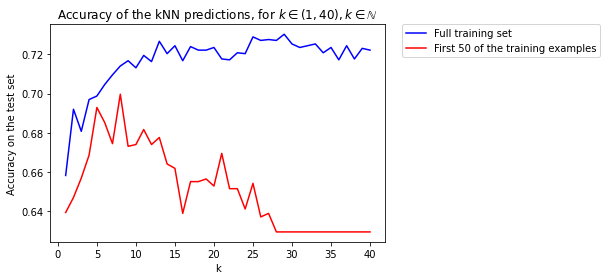

In [76]:
x = [i for i in range(1,41)]

fig = plt.figure()
ax = fig.add_subplot(111)
p1 = plt.plot(x, acc1_40, 'b-', label = 'Full training set')
p2 = plt.plot(x, acc2_40, 'r-', label = 'First 50 of the training examples') 

plt.title('Accuracy of the kNN predictions, for $k\in(1, 40), k\in\mathbb{N}$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_xlabel('k')
ax.set_ylabel('Accuracy on the test set')
plt.show()

Again, it looks like the full training set yields a better accuracy. We can further try to improve our KNN through cross validation.

In [153]:
accuracy_scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)

We can then find the mean accuracy score and standard deviation of the KNN model.

In [154]:
acc_mean = np.mean(accuracy_scores)
print('The mean accuracy score across the five iterations:')
print(acc_mean)

acc_std = np.std(accuracy_scores)

print('The standard deviation of the accuracy score across the five iterations:')
print(acc_std)

The mean accuracy score across the five iterations:
0.6821316674017857
The standard deviation of the accuracy score across the five iterations:
0.012700423977806416


These values are fairly good. Now, we can try to further optimize, but finding the best value of k through model selection.

In [155]:
num_examples = X_train.shape[0] 
param_grid = {'n_neighbors': np.linspace(2, np.sqrt(num_examples), 10, dtype=int)} 

param_grid

{'n_neighbors': array([ 2, 12, 22, 32, 42, 53, 63, 73, 83, 94])}

In [156]:
print('Running Grid Search...')

model = KNeighborsClassifier()

grid = GridSearchCV(model, param_grid, cv=5)

grid_search = grid.fit(X_train, y_train.values.ravel())

print('Done')

Running Grid Search...
Done


In [157]:
best_k = grid_search.best_params_
best_k = best_k['n_neighbors']
best_k

42

We find that the best value for k is 42, so we can now create an optimal model using this parameter.

In [158]:
model_best = KNeighborsClassifier(best_k)

model_best.fit(X_train, y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=42, p=2,
                     weights='uniform')

In [159]:
probability_predictions = model_best.predict_proba(X_test)[:,1]

class_label_predictions = model_best.predict(X_test)

In [160]:
# Compute and print the model's accuracy score
acc_score = accuracy_score(y_test, class_label_predictions)
print('Accuracy score: ' + str(acc_score))

Accuracy score: 0.7194957226474561


Through cross-validation and model selection for KNN, we've determined the best value for k to be 42, which allows for a model accuracy of around 72%.

In [161]:
from sklearn.metrics import precision_recall_curve

In [162]:
precision, recall, thresholds = precision_recall_curve(y_test.values.ravel(), probability_predictions)

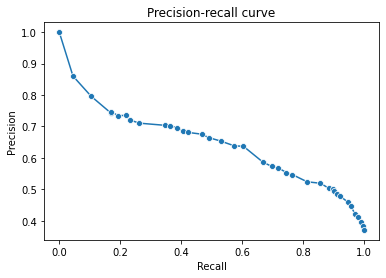

In [163]:
fig = plt.figure()
ax = fig.add_subplot(111)

sns.lineplot(x=recall, y=precision, marker = 'o')

plt.title("Precision-recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()